**ReadMe**

This project connects to the NBA statistics API (nba_api) to provide customized NBA insights based on user-selected player, team, and season. It features conference standings, player stats, season performance graphs, and team rankings over time, making NBA data accessible and easy to visualize for fans and analysts alike.

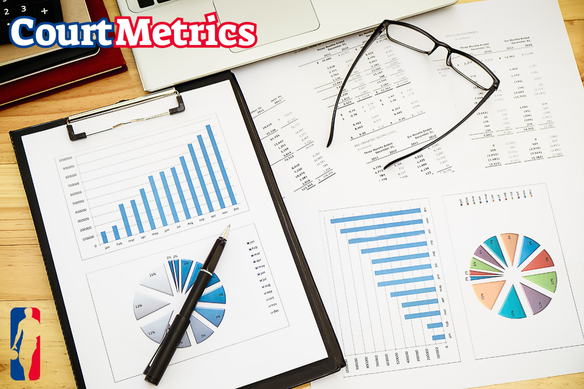

In [76]:
#https://pypi.org/project/nba_api/1.1.10/

!pip install nba_api

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

from nba_api.stats.endpoints import commonallplayers #מאחזר רשימה של כל השחקנים בהיסטוריה כאחד
from nba_api.stats.endpoints import leaguedashteamstats #מספק סטטיסטיקות קבוצתיות, כולל נקודות, אסיסטים, ריבאונדים ומדדים אחרים עבור כל קבוצה
from nba_api.stats.endpoints import leaguedashplayerstats #מאחזר סטטיסטיקות שחקנים כגון נקודות, אסיסטים, ריבאונדים ועוד עבור כל השחקנים
from nba_api.stats.endpoints import leaguegamefinder #מוצא ומאחזר מידע משחק על סמך קריטריונים ספציפיים (למשל, קבוצה, תאריך או עונה).
from nba_api.stats.endpoints import playercareerstats #מאחזר סטטיסטיקות קריירה עבור שחקני בודדים לאורך כל היסטוריית המשחקים שלהם.
from nba_api.stats.endpoints import leaguestandings #מאחזר את דירוג הקבוצה לעונה ספציפית

In [78]:
#הגדרת הנתונים הרלוונטים על ידי המשתמש באמצעות קובץ חיצוני

#Player--
!wget -O player.txt "https://drive.google.com/uc?export=download&id=1mKQP64JWSPeCrhoYjSa8DdQPZ1jl969J"

#Team--
!wget -O team.txt "https://drive.google.com/uc?export=download&id=1wrxtAZ3MdYqsygBfdkub6HrUWY38TLk5"

#Season--
!wget -O season.txt "https://drive.google.com/uc?export=download&id=1pzYfoUmKA3TrP52k7aCm7L8Os11H1GKp"

--2024-10-26 13:11:51--  https://drive.google.com/uc?export=download&id=1mKQP64JWSPeCrhoYjSa8DdQPZ1jl969J
Resolving drive.google.com (drive.google.com)... 173.194.215.138, 173.194.215.139, 173.194.215.113, ...
Connecting to drive.google.com (drive.google.com)|173.194.215.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1mKQP64JWSPeCrhoYjSa8DdQPZ1jl969J&export=download [following]
--2024-10-26 13:11:51--  https://drive.usercontent.google.com/download?id=1mKQP64JWSPeCrhoYjSa8DdQPZ1jl969J&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.215.132, 2607:f8b0:400c:c0c::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.215.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12 [application/octet-stream]
Saving to: ‘player.txt’

player.txt          100%[===================>]      12  --.-KB/s    in 0s 

In [79]:
#מבני נתונים:


#פוקנציה שמדפיסה את מבנה הנתונים שמקבלים מהאיי.פי.אי

def print_api_data_structure_players():
    players_data = commonallplayers.CommonAllPlayers(is_only_current_season=0).get_dict()
    players_headers = players_data['resultSets'][0]['headers']
    print(f'Data players Headers: {players_headers}')
    return players_headers

# פונקציה שמדפיסה את מבנה הנתונים של דירוג הקבוצות

def print_api_data_structure_standings():
    standings_data = leaguestandings.LeagueStandings().get_dict()
    standings_headers = standings_data['resultSets'][0]['headers']
    print(f'Data standings Headers: {standings_headers}')
    return standings_headers

# פונקציה שמדפיסה את מבנה הנתונים של סטטיסטיקות הקבוצות

def print_api_data_structure_team_stats():
    team_stats_data = leaguedashteamstats.LeagueDashTeamStats().get_dict()
    team_headers = team_stats_data['resultSets'][0]['headers']
    print(f'Team Stats Headers: {team_headers}')
    return team_headers


def print_api_data_structure_players_stats():
    players_stats_data = leaguedashplayerstats.LeagueDashPlayerStats().get_dict()
    players_stats_headers = players_stats_data['resultSets'][0]['headers']
    print(f'Players Stats Headers: {players_stats_headers}')

players_headers = print_api_data_structure_players()
standings_headers = print_api_data_structure_standings()
team_stats_headers = print_api_data_structure_team_stats()
players_stats_headers = print_api_data_structure_players_stats()

Data players Headers: ['PERSON_ID', 'DISPLAY_LAST_COMMA_FIRST', 'DISPLAY_FIRST_LAST', 'ROSTERSTATUS', 'FROM_YEAR', 'TO_YEAR', 'PLAYERCODE', 'PLAYER_SLUG', 'TEAM_ID', 'TEAM_CITY', 'TEAM_NAME', 'TEAM_ABBREVIATION', 'TEAM_CODE', 'TEAM_SLUG', 'GAMES_PLAYED_FLAG', 'OTHERLEAGUE_EXPERIENCE_CH']
Data standings Headers: ['LeagueID', 'SeasonID', 'TeamID', 'TeamCity', 'TeamName', 'Conference', 'ConferenceRecord', 'PlayoffRank', 'ClinchIndicator', 'Division', 'DivisionRecord', 'DivisionRank', 'WINS', 'LOSSES', 'WinPCT', 'LeagueRank', 'Record', 'HOME', 'ROAD', 'L10', 'Last10Home', 'Last10Road', 'OT', 'ThreePTSOrLess', 'TenPTSOrMore', 'LongHomeStreak', 'strLongHomeStreak', 'LongRoadStreak', 'strLongRoadStreak', 'LongWinStreak', 'LongLossStreak', 'CurrentHomeStreak', 'strCurrentHomeStreak', 'CurrentRoadStreak', 'strCurrentRoadStreak', 'CurrentStreak', 'strCurrentStreak', 'ConferenceGamesBack', 'DivisionGamesBack', 'ClinchedConferenceTitle', 'ClinchedDivisionTitle', 'ClinchedPlayoffBirth', 'Eliminated

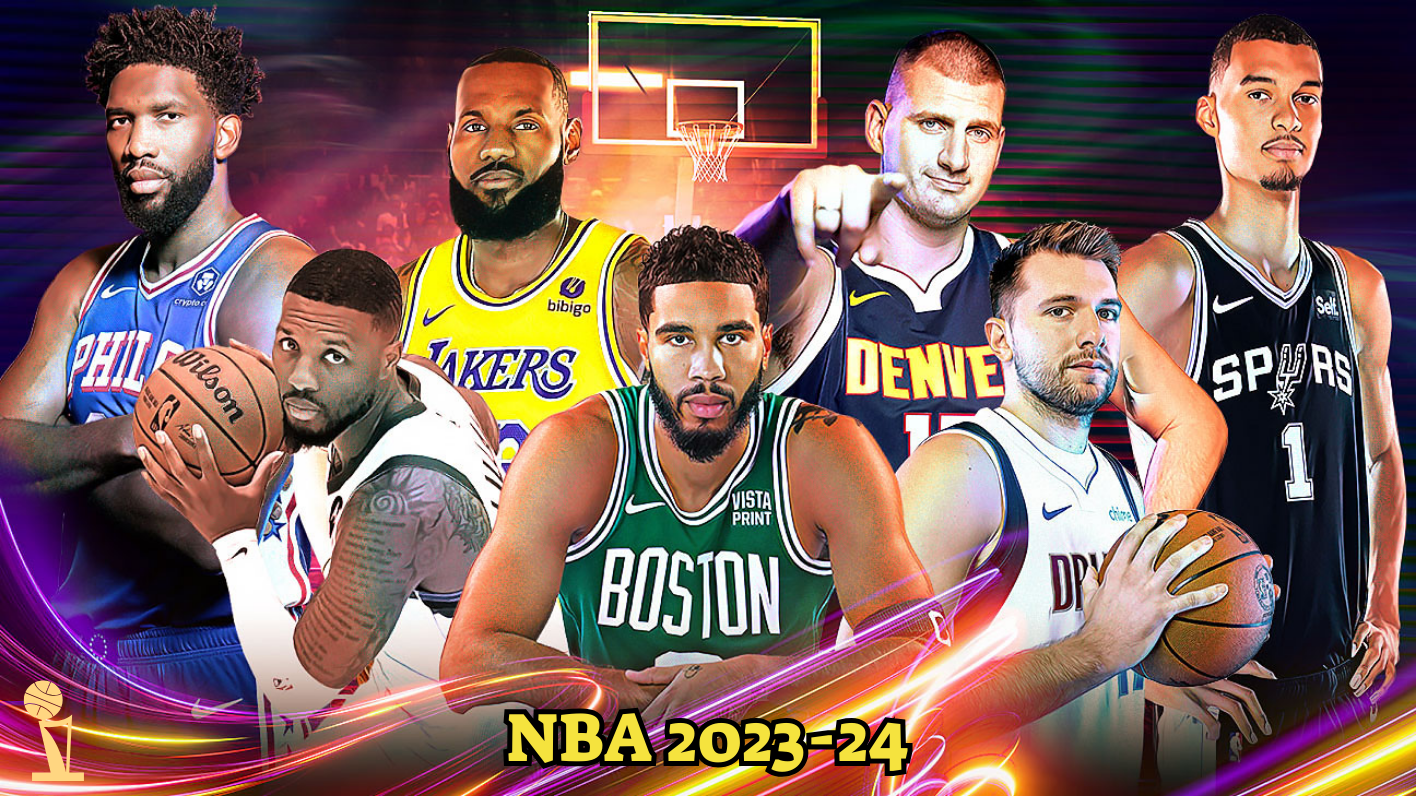

In [80]:
# פונקציות של עונה:

# פונקציה שמדפיסה דאטה פריים של נתונים של עונה ספיציפית

def print_league_standings(season):
    # מקבל את נתוני הדירוג לעונה ספציפית
    standings_data = leaguestandings.LeagueStandings(season=season).get_dict()

    # מחלץ את השורות והכותרות בשביל ליצור דאטה פריים
    team_data = standings_data['resultSets'][0]['rowSet']
    headers = standings_data['resultSets'][0]['headers']

    # יוצר דאטה פריים
    df_standings = pd.DataFrame(team_data, columns=headers)

    # מדפיס את הדאטה פריים
    print(df_standings)

def load_user_season(file_path): #קוראת השנה מהקובץ
  with open('season.txt', 'rt', encoding='utf-8-sig') as file:
    season = file.readline().strip()
  return season

def load_season_id(file_path):
  season_name = load_user_season(file_path)
  season_id = get_season_id(season_name)
  return season_id

def get_season_id(season_str):
    start_year = season_str.split('-')[0] # העונה נכתבת בפורמט '2023-24', נוציא את החלק הראשון
    season_id = f"{start_year}"
    return season_id

# הדפסה של טבלאות המחוזות על בסיס המספר של זיהוי העונה

def get_conference_teams_by_season(season_id):
    # קבלת נתוני הדירוג מהעונה המבוקשת
    standings_data = leaguestandings.LeagueStandings(season=season_id).get_dict()

    # יצירת DataFrame עבור הנתונים
    teams_data = standings_data['resultSets'][0]['rowSet']
    headers = standings_data['resultSets'][0]['headers']
    df = pd.DataFrame(teams_data, columns=headers)

    # יצירת מילונים עבור קבוצות ה-East וה-West
    east_teams = df[df['Conference'] == 'East'][['TeamID', 'TeamName', 'WINS', 'LOSSES', 'PlayoffRank']].set_index('TeamID').to_dict('index')
    west_teams = df[df['Conference'] == 'West'][['TeamID', 'TeamName', 'WINS', 'LOSSES', 'PlayoffRank']].set_index('TeamID').to_dict('index')

    return east_teams, west_teams


In [81]:
# הדפסה של העונה שהמתמש טען

season = load_user_season('season.txt')
print(season)

2023-2024


In [82]:
# הדפסה של המספר זיהוי של העונה של המשתמש

season_file = 'season.txt'
season_id = load_season_id(season_file)

print(f"Season ID for {season_file}: {season_id}")

Season ID for season.txt: 2023


In [83]:
# הדפסה של הטבלאות של המחוזות על בסיס העונה שהמתמש בחר

# קריאת נתוני העונה ויצירת המילונים עבור הקונפרנסים
east_teams_dict, west_teams_dict = get_conference_teams_by_season(season_id)

# המרה לטבלאות pandas עבור קבוצות ה-East וה-West
east_df = pd.DataFrame.from_dict(east_teams_dict, orient='index')
west_df = pd.DataFrame.from_dict(west_teams_dict, orient='index')

# הדפסת הטבלאות
print(f'East Conference Teams Table in {season}:')
print(east_df)

print(f'\nWest Conference Teams Table in {season}:')
print(west_df)


East Conference Teams Table in 2023-2024:
             TeamName  WINS  LOSSES  PlayoffRank
1610612738    Celtics    64      18            1
1610612752     Knicks    50      32            2
1610612749      Bucks    49      33            3
1610612739  Cavaliers    48      34            4
1610612753      Magic    47      35            5
1610612754     Pacers    47      35            6
1610612755      76ers    47      35            7
1610612748       Heat    46      36            8
1610612741      Bulls    39      43            9
1610612737      Hawks    36      46           10
1610612751       Nets    32      50           11
1610612761    Raptors    25      57           12
1610612766    Hornets    21      61           13
1610612764    Wizards    15      67           14
1610612765    Pistons    14      68           15

West Conference Teams Table in 2023-2024:
                 TeamName  WINS  LOSSES  PlayoffRank
1610612760        Thunder    57      25            1
1610612743        Nuggets

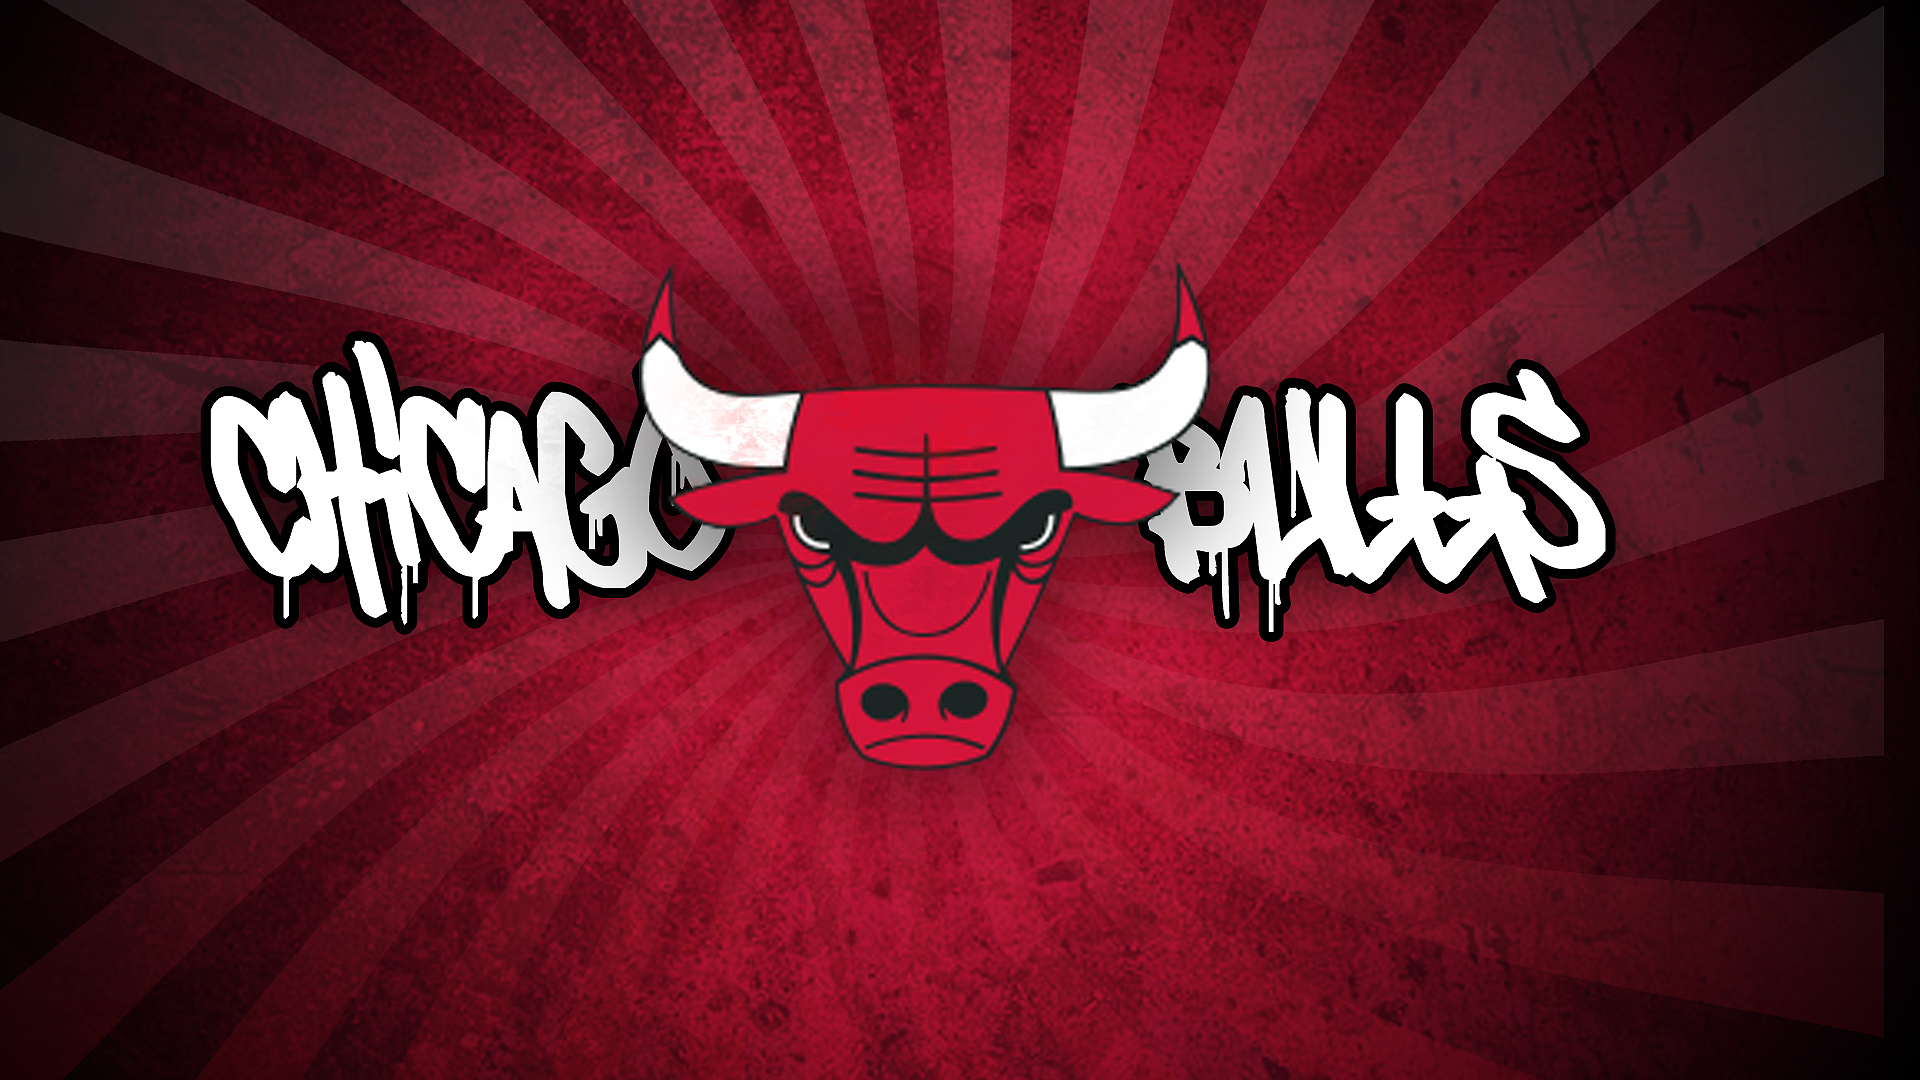

In [95]:
#פוקנציות קבוצות

def get_all_teams(): #מחזיר את כל הנתונים הסטטיסטיים של הקבוצות בעונה
  teams_data = leaguedashteamstats.LeagueDashTeamStats().get_data_frames()[0]
  return teams_data

def load_user_teams(file_path): #קוראת שם קבוצה מקובץ טקסט ומחזירה את השם כטקסט
  with open('team.txt', 'rt', encoding='utf-8-sig') as file:
    teams_names = file.readline().strip()
  return teams_names

def load_team(teams_names): #מחפש את המספר זיהוי של קבוצה מסוימת
  teams = leaguedashteamstats.LeagueDashTeamStats(season="2023-24").get_dict()['resultSets'][0]['rowSet']
  for team in teams:
    if teams_names.lower() in team[1].lower():
      return team[0]
  return "Team don't found"

#פוקנציה שמוציאה עבור הקבוצה את המיקום שלה בטבלה החל משנת 2000

def get_team_playoff_rank(team_id):
    # Define the seasons we want to fetch (you can expand or adjust this range)
    seasons = [f"{year}-{str(year+1)[-2:]}" for year in range(2000, 2024)]  # 2000-01 to 2023-24

    all_ranks = []

    # Loop through all seasons to get data
    for season in seasons:
        try:
            # Get the standings data for the specific season
            standings_data = leaguestandings.LeagueStandings(season=season).get_dict()

            # Extract the row set and headers to form a DataFrame
            team_data = standings_data['resultSets'][0]['rowSet']
            headers = standings_data['resultSets'][0]['headers']
            df_standings = pd.DataFrame(team_data, columns=headers)

            # Filter the DataFrame to find the team by TeamID
            team_row = df_standings[df_standings['TeamID'] == team_id]

            # If the team is found in this season, get its PlayoffRank
            if not team_row.empty:
                playoff_rank = team_row['PlayoffRank'].values[0]
                all_ranks.append((season, playoff_rank))
            else:
                all_ranks.append((season, None))  # If no rank, append None

        except Exception as e:
            # In case the API doesn't return data for some seasons
            all_ranks.append((season, None))
            print(f"Error fetching data for season {season}: {e}")

    # Return a DataFrame of all PlayoffRanks across seasons
    return pd.DataFrame(all_ranks, columns=['Season', 'PlayoffRank'])

# פונקציה שבונה גרף שמציג את מיקום הקבוצה בכל עונה

def plot_playoff_rank_from_df(team_playoff_ranks):
    # Filter out seasons with no PlayoffRank (None values)
    df_playoff_rank = team_playoff_ranks.dropna(subset=['PlayoffRank'])

    # Convert 'PlayoffRank' to integer (in case it's in float)
    df_playoff_rank['PlayoffRank'] = df_playoff_rank['PlayoffRank'].astype(int)

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(df_playoff_rank['Season'], df_playoff_rank['PlayoffRank'], marker='o', linestyle='-', color='blue')

    # Add labels to the points on the plot
    for i, rank in enumerate(df_playoff_rank['PlayoffRank']):
        plt.text(df_playoff_rank['Season'].iloc[i], df_playoff_rank['PlayoffRank'].iloc[i], f'{rank}',
                 fontsize=9, ha='right', color='black', bbox=dict(facecolor='white', edgecolor='none'))

    # Set plot details
    plt.title(f"Playoff Rank of {team_name} Over Seasons")
    plt.xlabel("Season")
    plt.ylabel(f'Playoff Rank of {team_name}')
    plt.gca().invert_yaxis()  # Invert Y-axis because rank 1 is better than rank 10
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot
    plt.show()

# פונקציה שבונה גרף שמציג את רצף הניצוחות הגבוה ביותר של קבוצה פר עונה

def plot_team_longest_win_streak_with_labels(team_id):
    # Get standings data for multiple seasons
    seasons = []
    long_win_streaks = []

    # Loop through desired seasons (or use a predefined range)
    for season in range(2000, 2024):
        season_id = f"{season}-{str(season + 1)[-2:]}"  # Format season as 'YYYY-YY'
        standings_data = leaguestandings.LeagueStandings(season=season_id).get_dict()

        # Extract data into DataFrame
        teams_data = standings_data['resultSets'][0]['rowSet']
        headers = standings_data['resultSets'][0]['headers']
        df = pd.DataFrame(teams_data, columns=headers)

        # Filter for the specified team and collect LongWinStreak
        team_data = df[df['TeamID'] == team_id]
        if not team_data.empty:
            long_win_streak = team_data['LongWinStreak'].values[0]
            if long_win_streak is not None:  # Check for valid data
                seasons.append(season_id)
                long_win_streaks.append(long_win_streak)

    # Plot the longest win streak per season
    plt.figure(figsize=(12, 7))
    plt.plot(seasons, long_win_streaks, marker='o', color='green', linestyle='-')

    # Adding labels for each data point
    for i, (season, streak) in enumerate(zip(seasons, long_win_streaks)):
        plt.text(season, streak, f'{streak}', fontsize=9, ha='center', va='bottom',
                 color='black', bbox=dict(facecolor='white', edgecolor='none'))

    # Set plot details
    plt.title(f'Longest Win Streak per Season for {team_name}')
    plt.xlabel('Season')
    plt.ylabel('Longest Win Streak')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


In [85]:
# מדפיס מספר זיהוי עבור הקבוצה שהמתמש בחר

team_file = 'team.txt'
team_name = load_user_teams(team_file)  # טען את שם הקבוצה מהקובץ
team_id = load_team(team_name)  # חפש את ה-ID של הקבוצה

print(f"Team ID for {team_name}: {team_id}")

Team ID for Chicago Bulls: 1610612741


In [86]:
# מיקום הקבוצה שהמשתמש בחר החל משנת 2000

team_playoff_ranks = get_team_playoff_rank(team_id)
print(team_playoff_ranks)

Error fetching data for season 2021-22: HTTPSConnectionPool(host='stats.nba.com', port=443): Read timed out. (read timeout=30)
Error fetching data for season 2023-24: HTTPSConnectionPool(host='stats.nba.com', port=443): Read timed out. (read timeout=30)
     Season  PlayoffRank
0   2000-01         15.0
1   2001-02         15.0
2   2002-03         12.0
3   2003-04         14.0
4   2004-05          3.0
5   2005-06          7.0
6   2006-07          5.0
7   2007-08         11.0
8   2008-09          7.0
9   2009-10          8.0
10  2010-11          1.0
11  2011-12          1.0
12  2012-13          5.0
13  2013-14          4.0
14  2014-15          3.0
15  2015-16          9.0
16  2016-17          8.0
17  2017-18         13.0
18  2018-19         13.0
19  2019-20         11.0
20  2020-21          0.0
21  2021-22          NaN
22  2022-23         10.0
23  2023-24          NaN


<ipython-input-95-511be6b648f6>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_playoff_rank['PlayoffRank'] = df_playoff_rank['PlayoffRank'].astype(int)


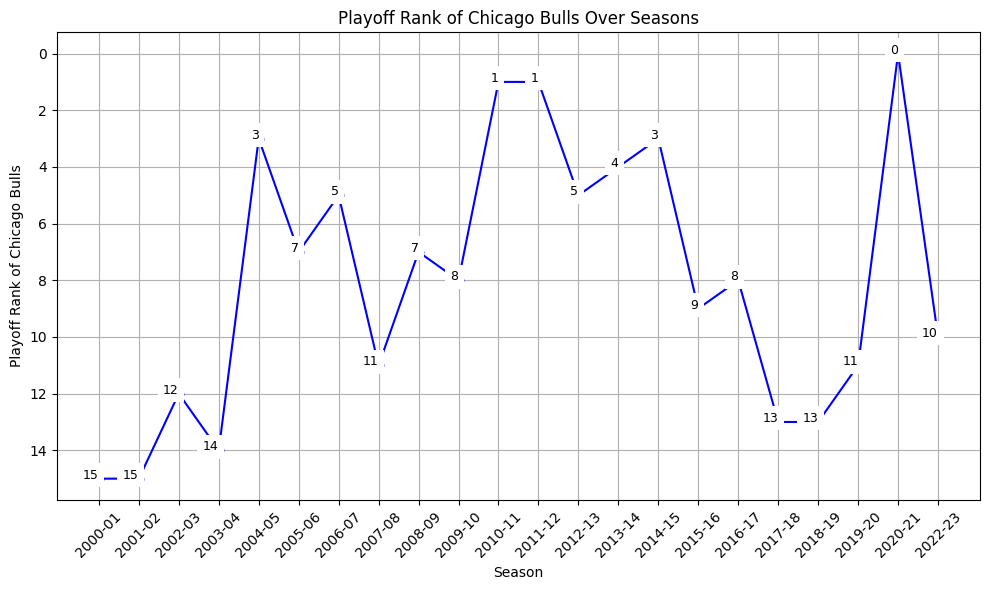

In [96]:
# גרף של מיקום הקבוצה בכל עונה

plot_playoff_rank_from_df(team_playoff_ranks)

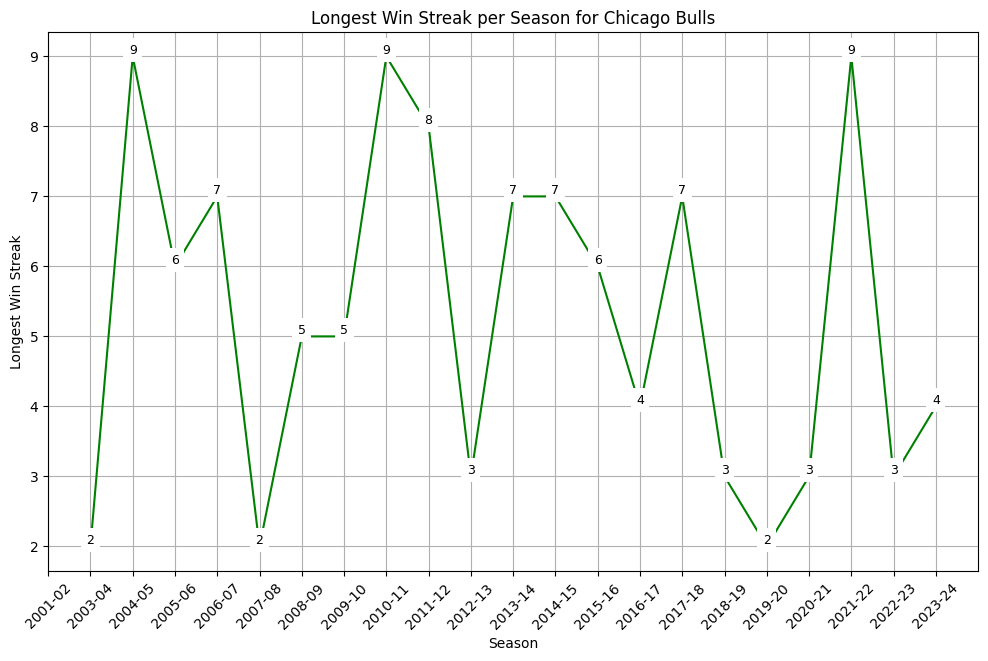

In [88]:
# גרף שמציג את רצף הניצוחות הגבוה ביותר של קבוצה פר עונה

plot_team_longest_win_streak_with_labels(team_id)

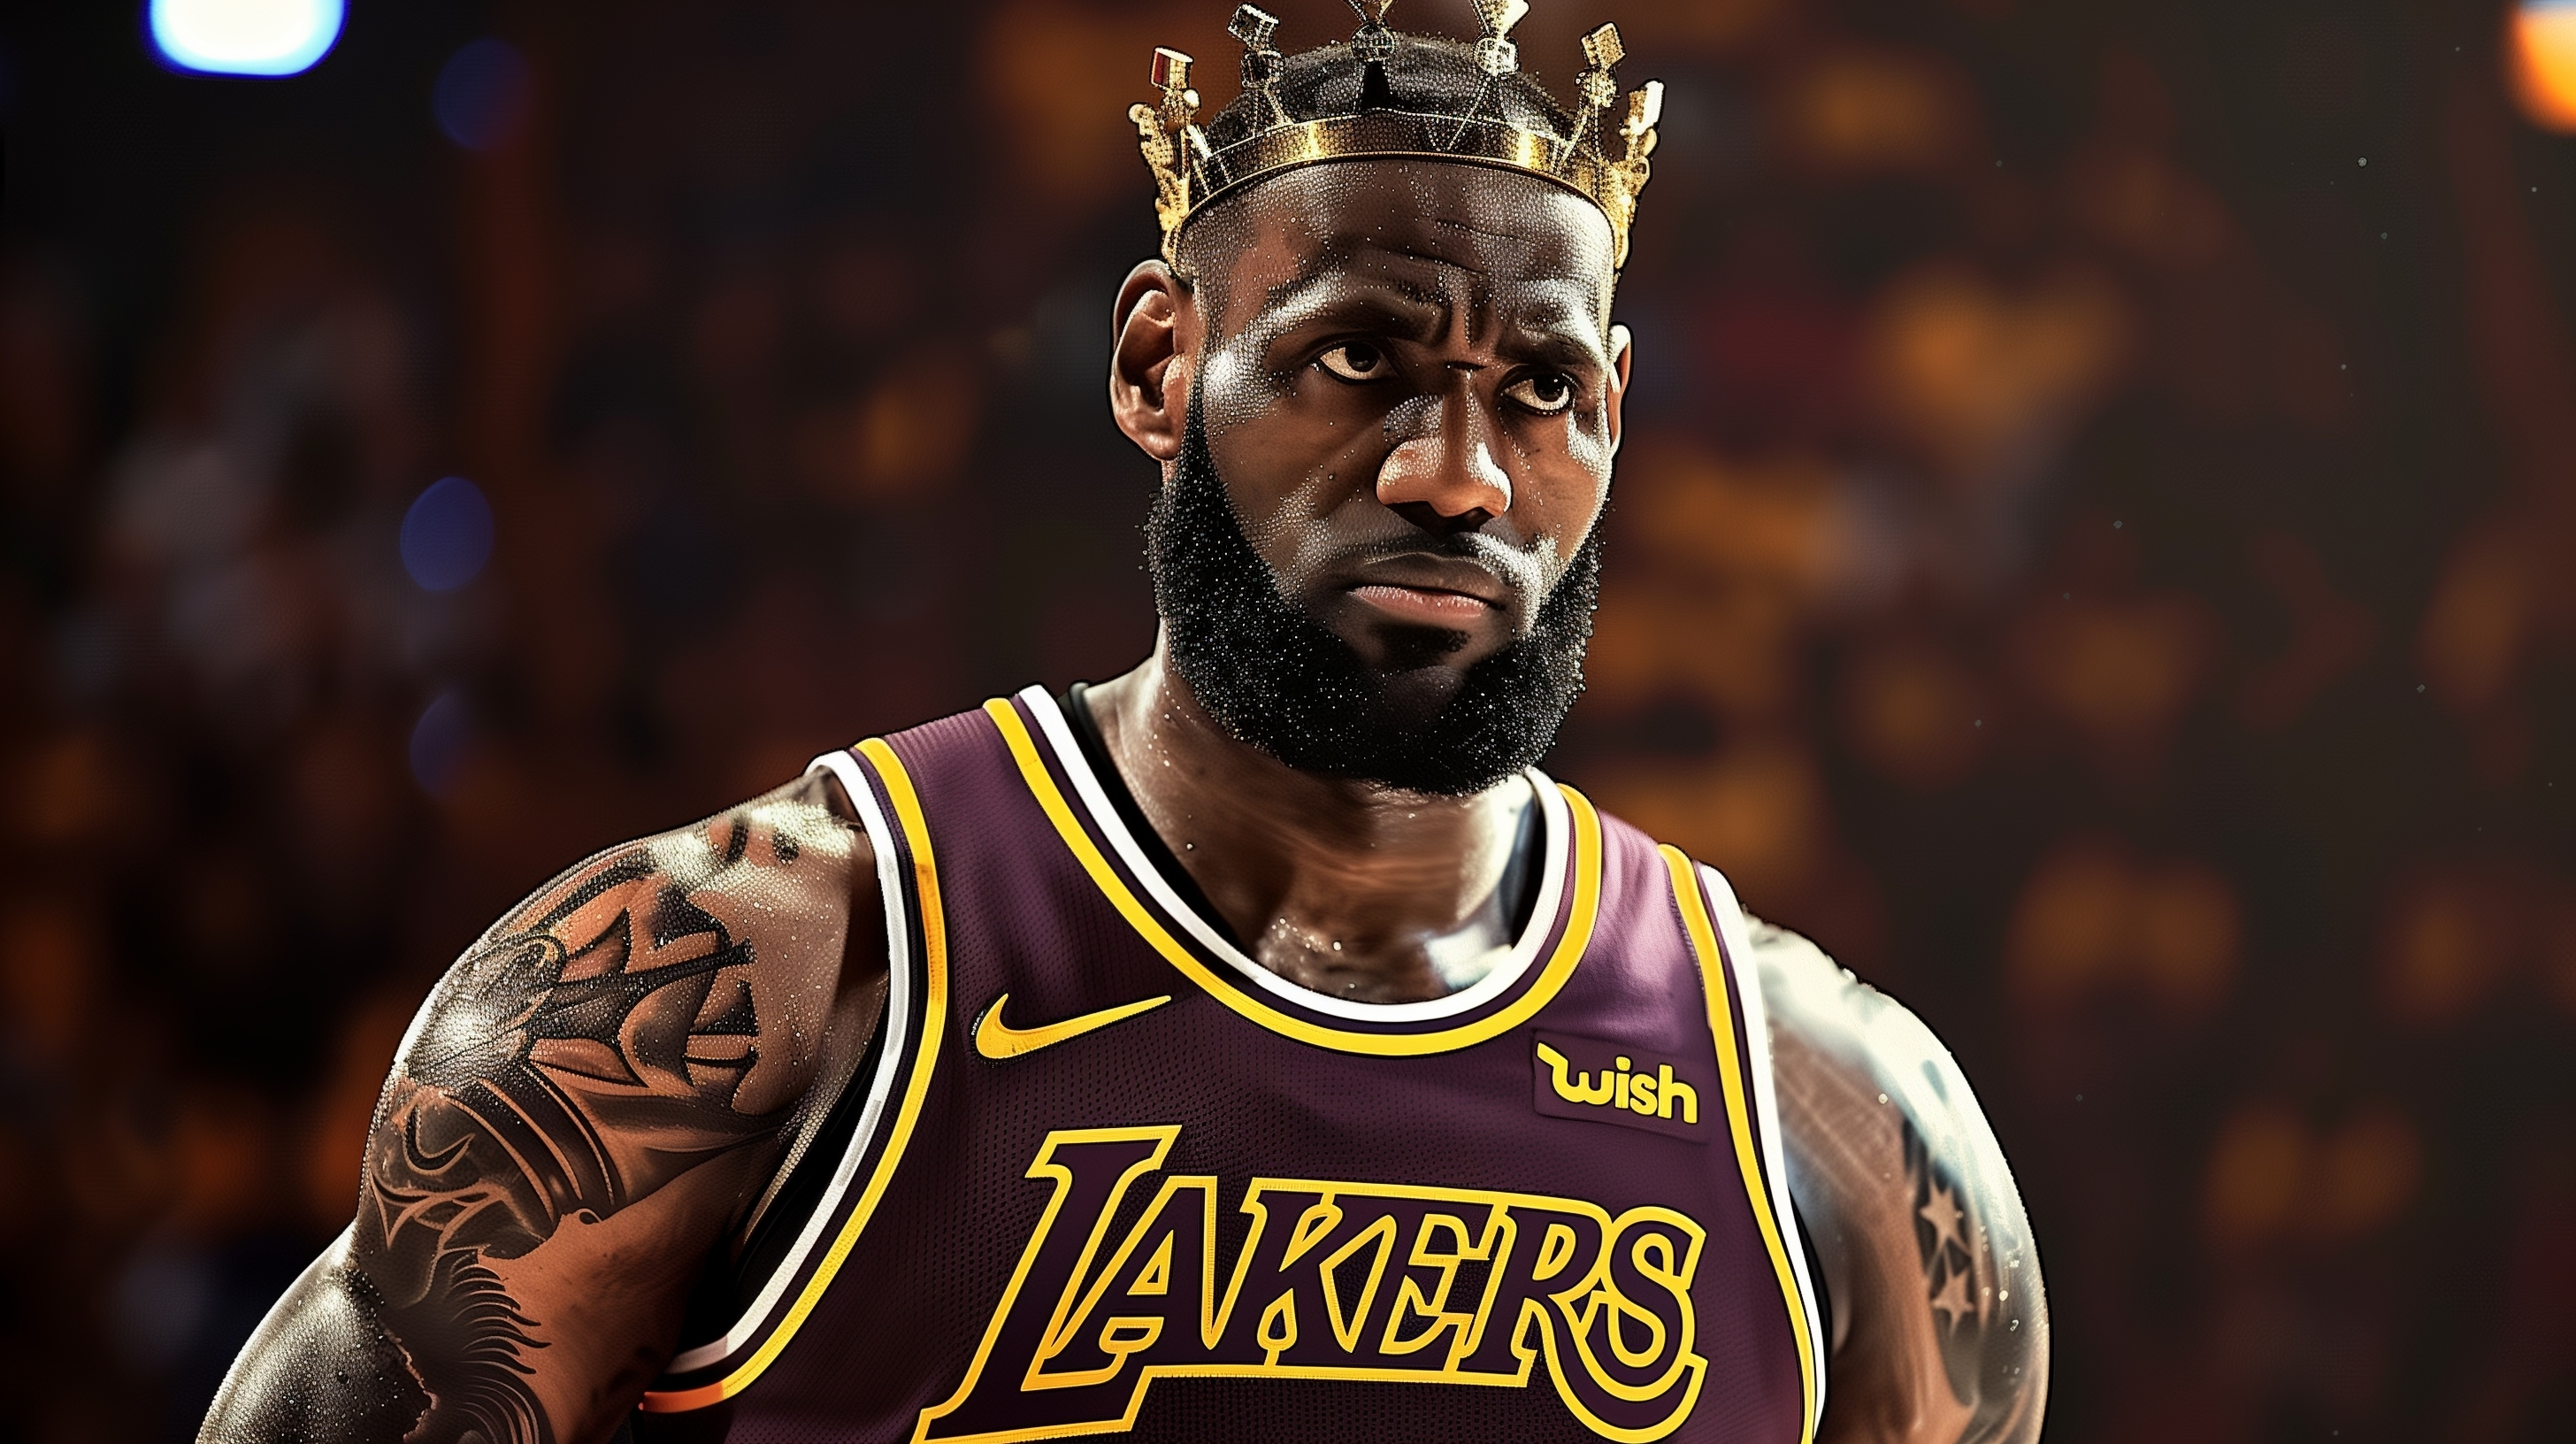

In [89]:
#פוקנציות שחקנים:

def get_all_players(): #מחזירה את כל השחקנים ממאגר הנתונים
 data = commonallplayers.CommonAllPlayers(is_only_current_season=0).get_data_frames()[0]
 return data

def load_user_player(file_path): #פונקציה שקוראת את שם השחקן מתוך קובץ ומחזירה אותו כטקסט
  with open('player.txt', 'rt', encoding='utf-8-sig') as file:
    players = file.readline().strip()
  return players

def load_player(players): #מחפשת את השחקן על בסיס השם מתוך המאגר
  players = commonallplayers.CommonAllPlayers(is_only_current_season=0).get_dict()['resultSets'][0]['rowSet'] #קבל נתונים לא רק על שחקנים שפעילים כרגע
  for player in players:
    if player_name.lower() in player[2].lower():
      return player[0]
  return "Player don't found"

# גרף שמציג את מספר הנקודות של שחקן פר עונה

def plot_player_points_per_season(player_data):
    # חילוץ עונות ונקודות
    seasons = player_data.index
    points = player_data['PTS']  # נתוני נקודות

    # יוצר גרף
    plt.figure(figsize=(10, 6))
    plt.plot(seasons, points, marker='o', linestyle='-', color='orange')

    for i, point in enumerate(points):
        plt.text(seasons[i], points[i], f'{point}', fontsize=9, ha='right',
                 color='black', bbox=dict(facecolor='white', edgecolor='none'))

    plt.title('Points Per Season')
    plt.xlabel(f'Season Number of {player_name}')
    plt.ylabel('Points')
    plt.grid(True)
    plt.xticks(seasons)  # Display all season numbers
    plt.show()

# פונקציה לשליפת נתוני השחקן במהלך הקריירה

def get_filtered_player_data(player_id):
    # שליפת כל נתוני הקריירה של השחקן
    career_stats = playercareerstats.PlayerCareerStats(player_id=player_id).get_dict()

    # שליפת הנתונים והכותרות
    player_data = career_stats['resultSets'][0]['rowSet']
    headers = career_stats['resultSets'][0]['headers']

    # יצירת DataFrame מהנתונים
    df = pd.DataFrame(player_data, columns=headers)

    # סינון העמודות הרלוונטיות בלבד
    filtered_df = df[[ 'PLAYER_AGE', 'GP', 'MIN', 'REB', 'AST', 'STL', 'BLK', 'PTS']]

    return filtered_df

# גרף שמציג את מספר הריבאונדים של שחקן פר עונה

def plot_player_rebounds_per_season(player_data):
    # חילוץ נקודות וריבאונדים
    seasons = player_data.index  # Season index based on the dataframe row number
    rebounds = player_data['REB']  # נתוני ריבאונדים

    # יוצר גרף
    plt.figure(figsize=(10, 6))
    plt.plot(seasons, rebounds, marker='o', linestyle='-', color='blue')  # Blue line for rebounds

    for i, rebound in enumerate(rebounds):
        plt.text(seasons[i], rebounds[i], f'{rebound}', fontsize=9, ha='right',
                 color='black', bbox=dict(facecolor='white', edgecolor='none'))

    plt.title('Rebounds Per Season')
    plt.xlabel(f'Season Number of {player_name}')
    plt.ylabel('Rebounds')
    plt.grid(True)
    plt.xticks(seasons)  # Display all season numbers
    plt.show()

# גרף שמציג את מספר האסיסטים של שחקן פר עונה

def plot_player_assists_per_season(player_data):
    seasons = player_data.index  # Season index based on the dataframe row number
    assists = player_data['AST']  # Assists data

    plt.figure(figsize=(10, 6))
    plt.plot(seasons, assists, marker='o', linestyle='-', color='purple')  # Purple line for assists

    for i, assist in enumerate(assists):
        plt.text(seasons[i], assists[i], f'{assist}', fontsize=9, ha='right',
                 color='black', bbox=dict(facecolor='white', edgecolor='none'))

    plt.title('Assists Per Season')
    plt.xlabel(f'Season Number of {player_name}')
    plt.ylabel('Assists')
    plt.grid(True)
    plt.xticks(seasons)  # Display all season numbers
    plt.show()



In [90]:
# מדפיס את המספר המזהה של השחקן

player_file = 'player.txt'
player_name = load_user_player(player_file)
player_id = load_player(player_name)

print(f"Player ID for {player_name}: {player_id}")

Player ID for Lebron James: 2544


In [91]:
# שליפת הנתונים והדפסה

player_data = get_filtered_player_data(player_id)
print(f"Player Data for {player_name}:")

print(player_data)


Player Data for Lebron James:
    PLAYER_AGE  GP     MIN  REB  AST  STL  BLK   PTS
0         19.0  79  3120.0  432  465  130   58  1654
1         20.0  80  3388.0  588  577  177   52  2175
2         21.0  79  3361.0  556  521  123   66  2478
3         22.0  78  3190.0  526  470  125   55  2132
4         23.0  75  3027.0  592  539  138   81  2250
5         24.0  81  3054.0  613  587  137   93  2304
6         25.0  76  2966.0  554  651  125   77  2258
7         26.0  79  3063.0  590  554  124   50  2111
8         27.0  62  2326.0  492  387  115   50  1683
9         28.0  76  2877.0  610  551  129   67  2036
10        29.0  77  2902.0  533  488  121   26  2089
11        30.0  69  2493.0  416  511  109   49  1743
12        31.0  76  2709.0  565  514  104   49  1920
13        32.0  74  2795.0  639  646   92   44  1954
14        33.0  82  3026.0  709  747  116   71  2251
15        34.0  55  1937.0  465  454   72   33  1505
16        35.0  67  2316.0  525  684   78   36  1698
17        36.0  

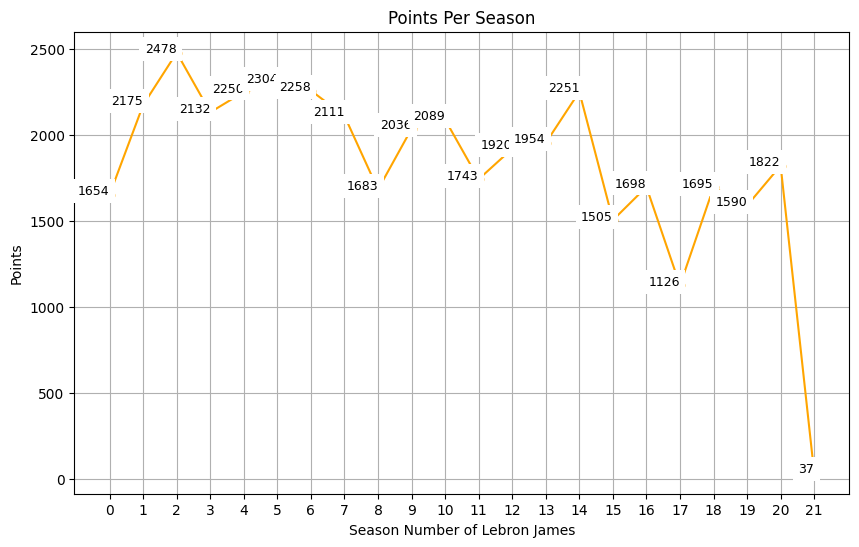

In [92]:
# מפעיל את הפונקציה עבור השחקן

plot_player_points_per_season(player_data)

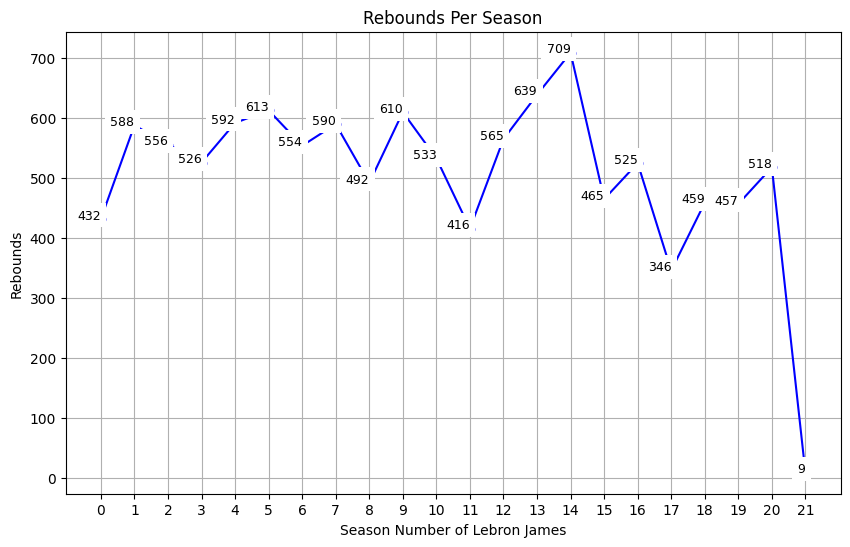

In [93]:
# גרף שמציג את מספר הריבאונדים של שחקן פר עונה

plot_player_rebounds_per_season(player_data)

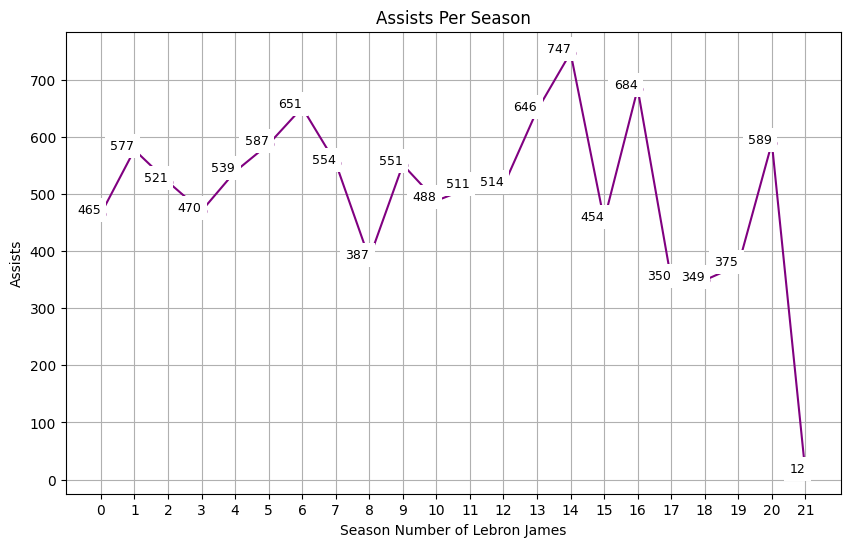

In [94]:
# גרף שמציג את מספר האסיסטים של שחקן פר עונה

plot_player_assists_per_season(player_data)